<a href="https://colab.research.google.com/github/skrzypczykt/MAchineLearningProjects/blob/main/RoC%20and%20classification/RoC_i_Precision_Recall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

data = np.genfromtxt('/content/data_ROC_PR.txt',
                     skip_header=0,
                     skip_footer=0,
                     names=True,
                     dtype=float,
                     delimiter=',')
df = pd.DataFrame(data)


In [ ]:
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,-2.101187,-0.247208,-1.989335,-1.484556,1.128668,-0.925564,1.210290,2.070526,0.091527,-2.376400,0.0
1,0.323703,-0.126894,-1.309524,-0.022738,-0.398725,0.280419,0.034598,1.184820,-0.186802,1.969326,0.0
2,-4.375435,0.334123,-0.852703,-2.701280,2.699135,-2.141198,-2.233844,-0.066448,-0.313881,1.499174,0.0
3,-1.537919,1.627132,0.484649,-1.020738,0.884990,-0.713543,0.943132,0.713558,-0.468041,0.075341,0.0
4,-3.240622,0.338141,-0.186530,-2.238088,1.786790,-1.455719,0.951526,0.398790,0.729005,0.372213,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,-1.148812,-0.048464,0.555170,-2.167311,-0.595136,0.237045,-1.241394,-0.144619,-0.136638,-1.363868,0.0
996,1.960479,1.269868,1.193456,-0.674479,-2.894824,1.992562,2.260748,-0.182916,-0.959332,0.263967,0.0
997,-1.169663,0.230641,-2.710394,-3.217224,-1.509607,0.795293,-0.854581,0.021500,-1.066801,0.528868,0.0
998,0.073129,-0.117844,0.149377,-0.255504,-0.313958,0.200589,-1.865016,0.340473,-0.276940,-0.871014,0.0


In [ ]:
df.y.value_counts()

0.0    986
1.0     14
Name: y, dtype: int64

In [ ]:
X,y = df.drop(['y'],axis=1), df['y']
train_ratio = 0.8

X_train,X_test, y_train,y_test  = train_test_split(X,y, test_size=1 - train_ratio , random_state=41)

In [ ]:
#Standaryzacja
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_test[:]

219    0.0
522    0.0
833    0.0
484    0.0
670    0.0
      ... 
835    0.0
938    0.0
873    0.0
757    0.0
537    0.0
Name: y, Length: 200, dtype: float64

In [ ]:
y_score

array([ -6.30828259,  -4.72056709,  -5.43254607,  -8.32987378,
        -7.99149802,  -7.16598479,  -3.95037095,  -7.63500295,
        -7.21669323,  -7.32765117,  -5.93784265,  -7.24104778,
        -8.79377643,  -4.92809242,  -6.13221157,  -6.19703774,
        -5.01324568,  -8.09396933,  -6.8064136 ,  -8.30900042,
        -5.57384343,  -5.91944659,  -7.02197222,  -5.29437591,
        -8.74460252,  -5.74482816,  -5.15926682,  -5.72822535,
        -5.53664525,  -5.47913074,  -4.52170797,  -5.57007097,
       -10.68666482,  -6.16607773,  -3.51299988,  -4.40973612,
        -8.00347045,  -7.29422232,  -8.87190112,  -5.66957984,
        -7.92487889,  -9.32574837,  -2.57991766,  -7.99471952,
        -9.50203454,  -7.77565373,  -3.42540332,  -7.92064689,
        -6.33872207,  -6.16143007,  -8.72028402,  -7.51906247,
        -6.74613046,  -8.39613488,  -6.07600184,  -7.17310451,
        -4.11068276,  -3.98355052,  -7.33016892,  -7.48330254,
       -10.83338121,  -5.2005148 ,  -3.80620937,  -7.18

In [ ]:
#source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
y_score = model.decision_function(X_test)
# Compute ROC curve and ROC area for each class
n_classes = 2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

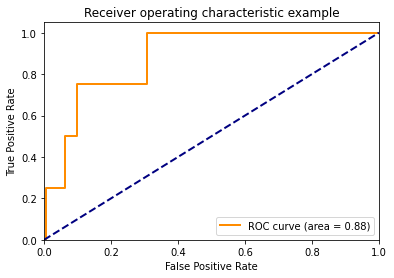

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Poziom AUC mocno powyżej 50%. Model przebija klasyfikator szacujący losowo. Model bardzo szybko osiąga TP rate = 100% - już dla FP Rate wynoszącym około 0.3. Model wygląda tutaj obiecująco.

 Kształt krzywej jest prawidłowy: 
 - znajduje się w całości nad przekątną 
 -Jest ona też niemalejąca.

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.21')

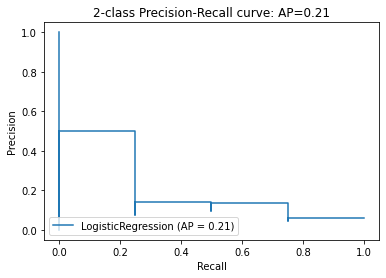

In [ ]:
#source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve


disp = plot_precision_recall_curve(model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

Krzywa jest mocno *poucinana*, być może rozważono za **małą liczbę różnych thresholdów**. Może to wynikać z **małego zbioru testowego**. AP=0.21 oznacza, że model wypada tutaj słabo.

Generalnie obserwujemy **spadek** - prawidłowe zachowanie. Użycie tego modelu dla wysokiego recall wydaje się być bezsensowne - wyjątkowo niska precyzja.

*Najlepszym poziomem *będzie (mniej wiecej) **recall=0.22** i **precyzja = 0.5**. To najwieksza precyzja jaką można uzyskać przy sensownym recallu. Recall na poziomie około 0.10 wydaje się dawać model całkiem bezużyteczny.